<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/Project_Belajar_Analisis_Data_dengan_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyek Analisis Data**

Analisis Pengaruh Cuaca dan Waktu terhadap permintaan penyewaan sepeda

Pertanyaan bisnis:

1. Bagaimana pengaruh faktor cuaca terhadap peminjaman sepeda?
2. Bagaimana pola jumlah peminjaman berubah dari musim hujan ke musim kemarau?

Tujuan :
1. penyedia layanan sepeda perlu memperkirakan jumlah peminjaman agar stok sepeda dan staff operasional sesuai kebutuhan
2. pola musiman dan harian berdasarkan cuaca belum terdokumentasi dengan baik, padahal pola ini penting untuk jadwal distribusi sepeda.

Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


Data Wrangling

Gathering Data

Memuat Tabel bike_df

In [ ]:
bike_df = pd.read_csv("/content/hour.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Assessing Data

Menilai Data bike_df

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa parameter statistik dari kolom numerik

In [ ]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cleaning Data

Membersihkan Data (menghilangkan duplicate data, missing value, melihat nilai yang dominan)

duplicate data

In [ ]:
bike_df.drop_duplicates(inplace=True)

missing value

In [ ]:
bike_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


innaccurate value


In [ ]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Exploratory Data Analysis (EDA)

explore bike_df

In [ ]:
bike_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14410,14411,2012-08-28,3,1,8,15,0,2,1,1,0.82,0.7273,0.34,0.2985,59,258,317
17116,17117,2012-12-20,4,1,12,23,0,4,1,3,0.40,0.4091,0.82,0.2985,0,13,13
15103,15104,2012-09-26,4,1,9,12,0,3,1,1,0.68,0.6364,0.61,0.2239,56,260,316
13392,13393,2012-07-17,3,1,7,5,0,2,1,1,0.68,0.6364,0.74,0.0896,7,31,38
5011,5012,2011-08-01,3,0,8,17,0,1,1,1,0.76,0.6818,0.45,0.2985,69,445,514


In [ ]:
bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Bagaimana pengaruh faktor cuaca terhadap peminjaman sepeda? **

In [ ]:
bike_df.groupby("cnt").agg({
          "weathersit": ["mean", "max", "min", "std"],
          "temp": ["mean", "max", "min"],
          "hum":  ["mean"],
          "windspeed": ["mean"]
      })


weathersit                        temp                   hum windspeed
          mean max min       std      mean   max   min      mean      mean
cnt                                                                       
1     1.563291   3   1  0.743837  0.270380  0.66  0.02  0.685063  0.199986
2     1.552885   3   1  0.733657  0.322500  0.72  0.02  0.700913  0.177172
3     1.607143   3   1  0.761838  0.347054  0.72  0.02  0.717054  0.167717
4     1.463203   3   1  0.670617  0.402771  0.76  0.08  0.748268  0.157530
5     1.511538   3   1  0.721874  0.420077  0.76  0.02  0.730115  0.158156
..         ...  ..  ..       ...       ...   ...   ...       ...       ...
967   1.000000   1   1       NaN  0.660000  0.66  0.66  0.390000  0.283600
968   1.000000   1   1       NaN  0.620000  0.62  0.62  0.350000  0.298500
970   1.000000   1   1       NaN  0.700000  0.70  0.70  0.280000  0.000000
976   1.000000   1   1       NaN  0.640000  0.64  0.64  0.500000  0.223900
977   1.000000   1   1       NaN  0.660000  0.66  0.66  0.440000  0.253700

[869 rows x 9 columns]

rata-rata jumlah sewa sepeda pada cuaca

In [ ]:
bike_df.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


rata-rata jumlah sewa sepeda pada musim

In [ ]:
bike_df.groupby("season")["cnt"].mean()


,cnt
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


In [ ]:
bike_df.groupby("weathersit").agg({
          "season": ["mean", "max", "min", "std"],
          "weekday": ["mean", "max", "min"],
          "mnth":  ["mean"],
          "yr": ["mean"]
      })


season                     weekday              mnth        yr
                mean max min       std      mean max min      mean      mean
weathersit                                                                  
1           2.511084   4   1  1.083600  2.999124   6   0  6.511872  0.505389
2           2.492518   4   1  1.153214  3.010563   6   0  6.618838  0.511884
3           2.458069   4   1  1.139202  3.017618   6   0  6.498238  0.449612
4           1.000000   1   1  0.000000  3.333333   6   1  1.000000  0.666667

korelasi antar variabel

In [ ]:
bike_df[["temp","hum","windspeed","cnt"]].corr()

,temp,hum,windspeed,cnt
temp,1.000000,-0.069881,-0.023125,0.404772
hum,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.290105,1.000000,0.093234
cnt,0.404772,-0.322911,0.093234,1.000000


**Bagaimana pola jumlah peminjaman berubah dari musim hujan ke musim kemarau?**

Menunjukkan perbedaan total peminjaman antara musim hujan vs kemarau.

In [ ]:
bike_df.groupby('season')['cnt'].mean()


,cnt
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


Visualization & Explanatory Analysis

**Bagaimana pengaruh faktor cuaca terhadap peminjaman sepeda?**



**Jumlah Sewa per Kategori Cuaca**

/tmp/ipython-input-1206635822.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x="weathersit", y="cnt", data=bike_df, estimator="mean", ci=None)


<Axes: xlabel='weathersit', ylabel='cnt'>

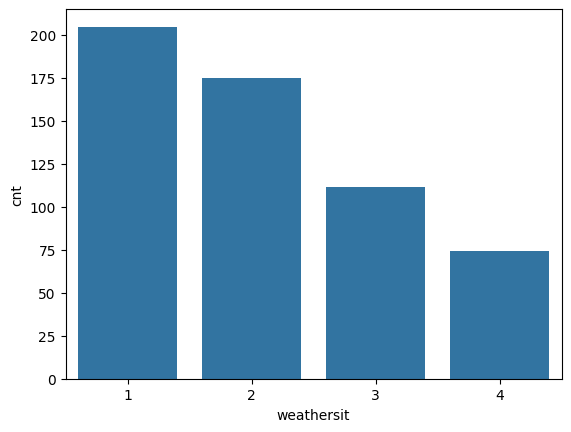

In [ ]:
sn.barplot(x="weathersit", y="cnt", data=bike_df, estimator="mean", ci=None)

Menunjukkan perbedaan rata-rata/penyebaran jumlah sewa di tiap kondisi cuaca.

Peminjaman sepeda meningkat saat suhu hangat, menurun saat kelembapan/angin tinggi, dan paling rendah ketika cuaca hujan/salju

**Hubungan Suhu dengan Jumlah Sewa**

<Axes: xlabel='temp', ylabel='cnt'>

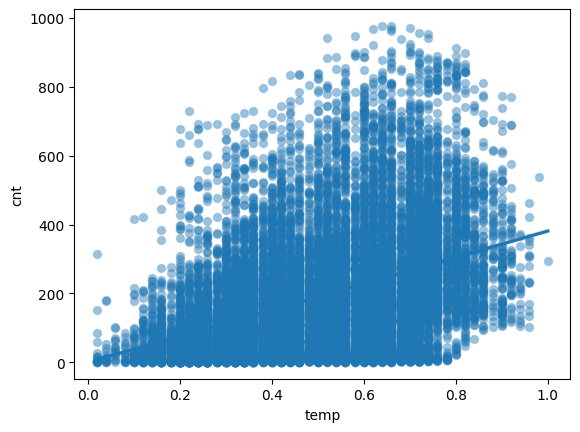

In [ ]:
sn.scatterplot(x="temp", y="cnt", data=bike_df, alpha=0.3)

Melihat apakah suhu lebih tinggi - lebih banyak peminjaman

**Kelembapan dan Angin**


<Axes: xlabel='hum', ylabel='cnt'>

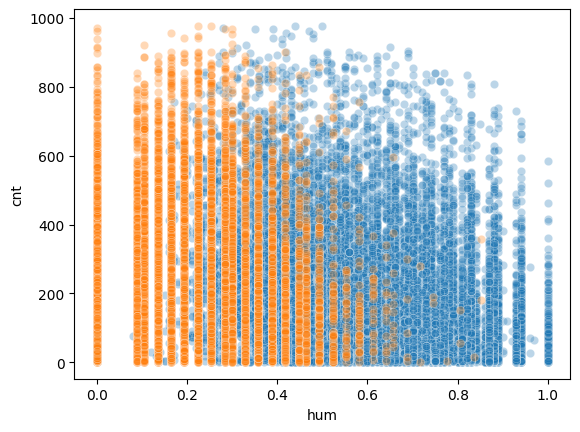

In [ ]:
sn.scatterplot(x="hum", y="cnt", data=bike_df, alpha=0.3)

<Axes: xlabel='windspeed', ylabel='cnt'>

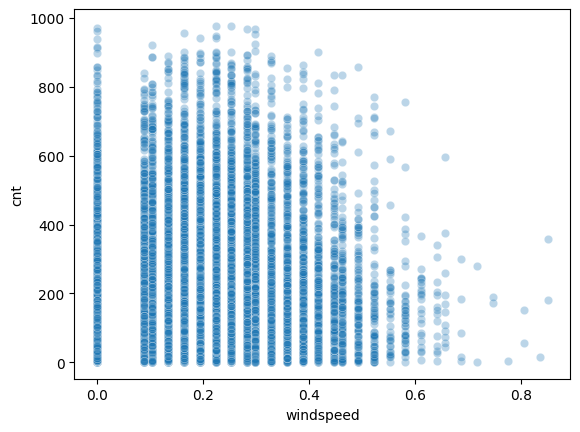

In [ ]:
sn.scatterplot(x="windspeed", y="cnt", data=bike_df, alpha=0.3)

bisa menilai apakah kelembapan tinggi atau angin kencang menurunkan sewa

**Heatmap korelasi**

<Axes: xlabel='hum', ylabel='cnt'>

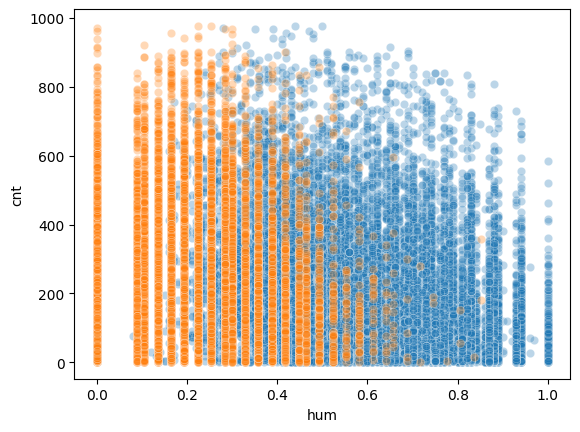

In [ ]:
sn.scatterplot(x="hum", y="cnt", data=bike_df, alpha=0.3)
sn.scatterplot(x="windspeed", y="cnt", data=bike_df, alpha=0.3)


**Bagaimana pola jumlah peminjaman berubah dari musim hujan ke musim kemarau?**

Menunjukkan distribusi & rata-rata jumlah sewa tiap musim

/tmp/ipython-input-3562944355.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x="season", y="cnt", data=bike_df, estimator="mean", ci=None)


<Axes: xlabel='season', ylabel='cnt'>

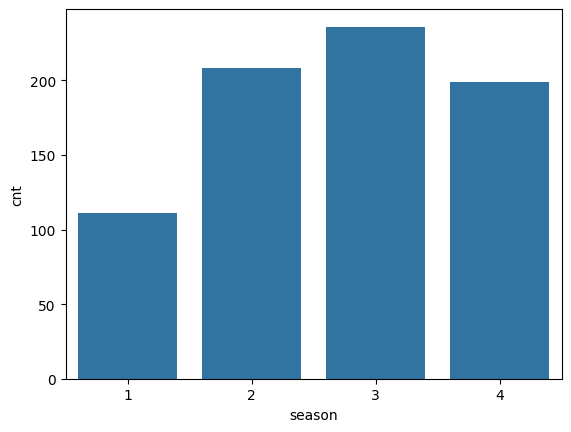

In [ ]:
sn.barplot(x="season", y="cnt", data=bike_df, estimator="mean", ci=None)

Mudah terlihat apakah musim kemarau (summer/fall) memang punya rata-rata lebih tinggi dibanding musim hujan.

Melihat pola temporal dari awal tahun ke akhir tahun dengan pembeda musim.

/tmp/ipython-input-3715676237.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(x="dteday", y="cnt", hue="season", data=bike_df, ci=None)


<Axes: xlabel='dteday', ylabel='cnt'>

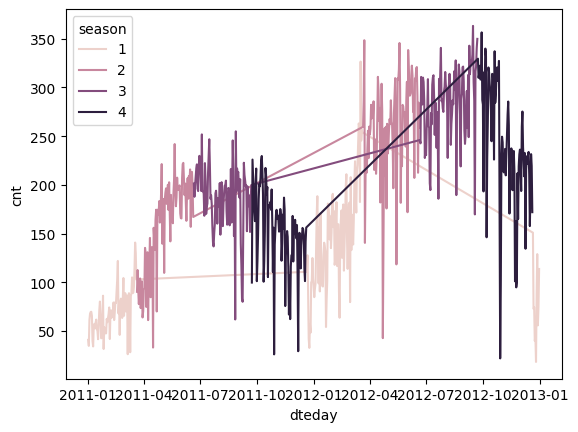

In [ ]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
sn.lineplot(x="dteday", y="cnt", hue="season", data=bike_df, ci=None)

Memberi gambaran perubahan sewa dari hari ke hari, garis warna menandai musim.

menghitung rata-rata bulanan per musim, lalu line plot per bulan.

/tmp/ipython-input-1610171322.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = bike_df.resample('M', on='dteday')['cnt'].mean().reset_index()


<Axes: xlabel='dteday', ylabel='cnt'>

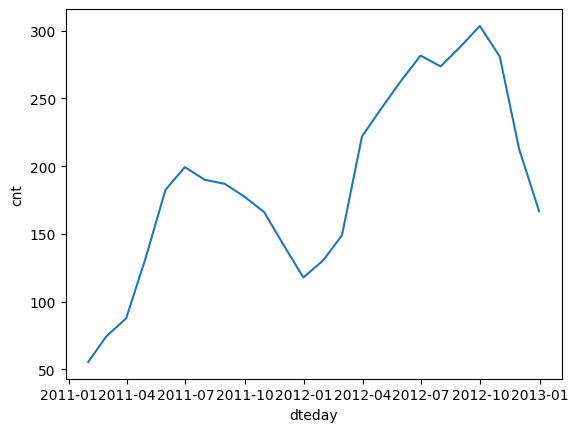

In [ ]:
monthly = bike_df.resample('M', on='dteday')['cnt'].mean().reset_index()
sn.lineplot(x="dteday", y="cnt", data=monthly)

In [ ]:
bike_df.to_csv("bikeall_data.csv", index=False)